In [42]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder

In [6]:
# load dataset
iris = load_iris()

In [8]:
X = iris.data
y = iris.target

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# scale the featurs
scaler = StandardScaler()

In [14]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
# define the model
model = Sequential()

In [20]:
model.add(Dense(8, input_dim=4, activation='relu'))
model.add(Dense(3, activation='softmax'))

C:\Users\MSI1\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
# compile the model 
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

ValueError: Argument(s) not recognized: {'lr': 0.001}

In [25]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [27]:
# train the model 
history = model.fit(X_train, y_train, validation_data=(X_test,y_test),epochs=100,batch_size=32, verbose=0)

In [29]:
# evaluate the model 
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss : {loss:.4f}')
print(f'Test Accuracy : {accuracy:.4f}')

Test Loss : 0.3087
Test Accuracy : 0.9667


In [30]:
# predict 
y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


In [31]:
y_pred = np.argmax(y_pred, axis=1)

In [32]:
# classification report and confusion matrix
print('classification report')
print(classification_report(y_test,y_pred))

classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



In [35]:
from sklearn.metrics import confusion_matrix

In [39]:
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:


TypeError: Expected sequence or array-like, got <class 'ellipsis'>

In [40]:
y_test = np.array([...])  
y_pred = np.array([...])

In [43]:
encoder = LabelEncoder()
y_test_encoded = encoder.fit_transform(y_test)
y_pred_encoded = encoder.transform(y_pred)

In [44]:
print('Confusion Matrix:')
print(confusion_matrix(y_test_encoded, y_pred_encoded))

Confusion Matrix:
[[1]]


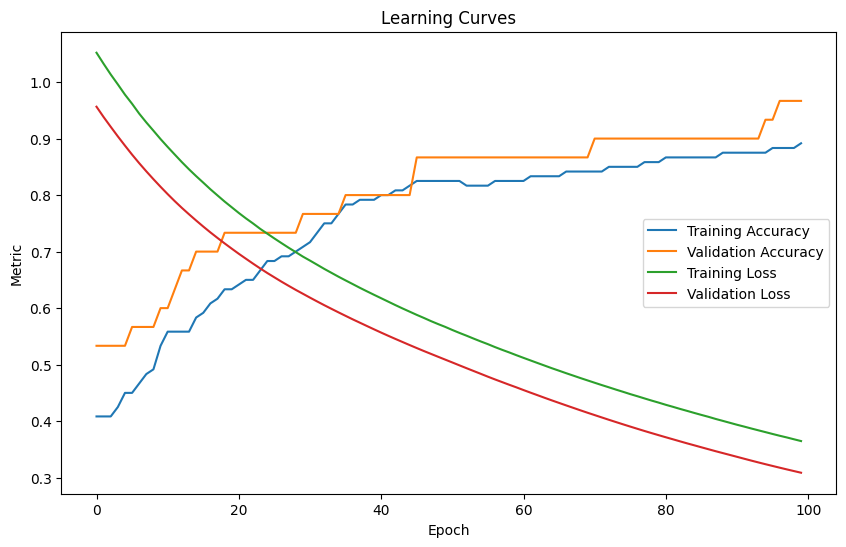

In [38]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Metric')
plt.title('Learning Curves')
plt.legend()
plt.show()